In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/m5/sales_train_validation.csv')
d_1 = pd.Timestamp("2011-01-29")
df

,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,0,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [6]:
df['unique_id'] = df['dept_id'] + '_' + df['store_id']
d_x = [f"d_{i}" for i in range(1, 1914)]
ds = pd.date_range(start=d_1 + pd.Timedelta(0, freq='d'), freq='d', periods=1913)
df_group = df.groupby('unique_id')[d_x].sum()
df_group = df_group.reset_index(drop=False)
print(df.columns)
df_group = df_group.rename(columns=dict(zip(d_x, ds)))
df_group

Index(['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd_1', 'd_2',
       'd_3', 'd_4', 'd_5',
       ...
       'd_1905', 'd_1906', 'd_1907', 'd_1908', 'd_1909', 'd_1910', 'd_1911',
       'd_1912', 'd_1913', 'unique_id'],
      dtype='object', length=1919)


,unique_id,2011-01-29 00:00:00,2011-01-30 00:00:00,2011-01-31 00:00:00,2011-02-01 00:00:00,2011-02-02 00:00:00,2011-02-03 00:00:00,2011-02-04 00:00:00,2011-02-05 00:00:00,2011-02-06 00:00:00,...,2016-04-15 00:00:00,2016-04-16 00:00:00,2016-04-17 00:00:00,2016-04-18 00:00:00,2016-04-19 00:00:00,2016-04-20 00:00:00,2016-04-21 00:00:00,2016-04-22 00:00:00,2016-04-23 00:00:00,2016-04-24 00:00:00
0,FOODS_1_CA_1,297,284,214,175,182,191,224,263,245,...,293,317,268,302,237,287,297,331,419,329
1,FOODS_1_CA_2,406,408,238,240,220,263,304,353,313,...,535,504,515,327,366,422,334,579,623,520
2,FOODS_1_CA_3,341,326,260,231,220,258,285,309,404,...,420,500,457,301,331,306,276,335,510,423
3,FOODS_1_CA_4,113,124,75,97,107,84,100,111,87,...,284,241,193,196,185,201,190,229,250,257
4,FOODS_1_TX_1,152,154,109,126,108,153,72,126,119,...,204,244,245,193,138,176,198,201,218,221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,HOUSEHOLD_2_TX_2,199,183,117,108,98,110,133,200,188,...,210,246,270,134,193,182,187,211,260,244
66,HOUSEHOLD_2_TX_3,120,138,97,83,46,102,120,141,135,...,198,218,201,127,189,158,161,131,185,191
67,HOUSEHOLD_2_WI_1,148,151,66,47,0,105,126,186,96,...,196,225,199,143,131,158,169,192,203,224
68,HOUSEHOLD_2_WI_2,98,94,69,80,32,107,100,111,63,...,136,138,137,139,147,113,127,160,194,177


In [12]:
def generate_single_seqs(df, num_seqs=-1, selected_ids=None, num_week_shift=0, num_days_shift=0, start_date=None, end_date=None, seed=123):
    '''
    selected_ids is a string of id
    '''
    np.random.seed(seed)
    df.loc[-1] = df.columns
    all_ids = df['unique_id']  # the last one is 'category', TODO: check SF traffic
    # TODO: add multiple sequences per line... for now assume ignore num_seqs
    if selected_ids is None:
        # assert num_seqs <= len(all_ids)  # TODO: could be extended
        if num_seqs == -1:
            selected_ids = all_ids
        else:
            selected_ids = all_ids.sample(n=num_seqs).tolist()
    col_idx = all_ids.index[all_ids.isin(selected_ids)].tolist()
    if len(col_idx) > 1:
        column_dict = []
        for col, i in enumerate(col_idx[:-1]):
            df_seq = df.iloc[[-1, col], 1:-1]  # TODO
            df_seq = df_seq.T  # TODO: fix for multiple sequences for df_seqs
            df_seq.columns = ['ds', 'y']
            column_dict.append([selected_ids[i], i])
            df_seq['unique_id'] = i
            df_seq['ds'] = pd.to_datetime(df_seq['ds'])  # TODO: fix the deprecated behavior
            df_seq.reset_index(drop=True, inplace=True)
            if col == col_idx[0]:
                df_new = df_seq
            else:
                df_new = pd.concat([df_new, df_seq])
        df_new = df_new.reset_index(drop=True)
        return df_new, column_dict
    else:
        df_seq = df.iloc[[-1, col_idx[0]], 1:-1]  # TODO
        df_seq = df_seq.T  # TODO: fix for multiple sequences for df_seqs
        df_seq.columns = ['ds', 'y']
        df_seq['unique_id'] = selected_ids[0]
        df_seq['ds'] = pd.to_datetime(df_seq['ds'])  # TODO: fix the deprecated behavior
        df_seq.reset_index(drop=True, inplace=True)
        return df_seq    

df_single, column_dict = generate_single_seqs(df_group.copy())
df_single

,ds,y,unique_id
0,2011-01-29,297,0
1,2011-01-30,284,0
2,2011-01-31,214,0
3,2011-02-01,175,0
4,2011-02-02,182,0
...,...,...,...
133835,2016-04-19,120,69
133836,2016-04-20,148,69
133837,2016-04-21,142,69
133838,2016-04-22,166,69


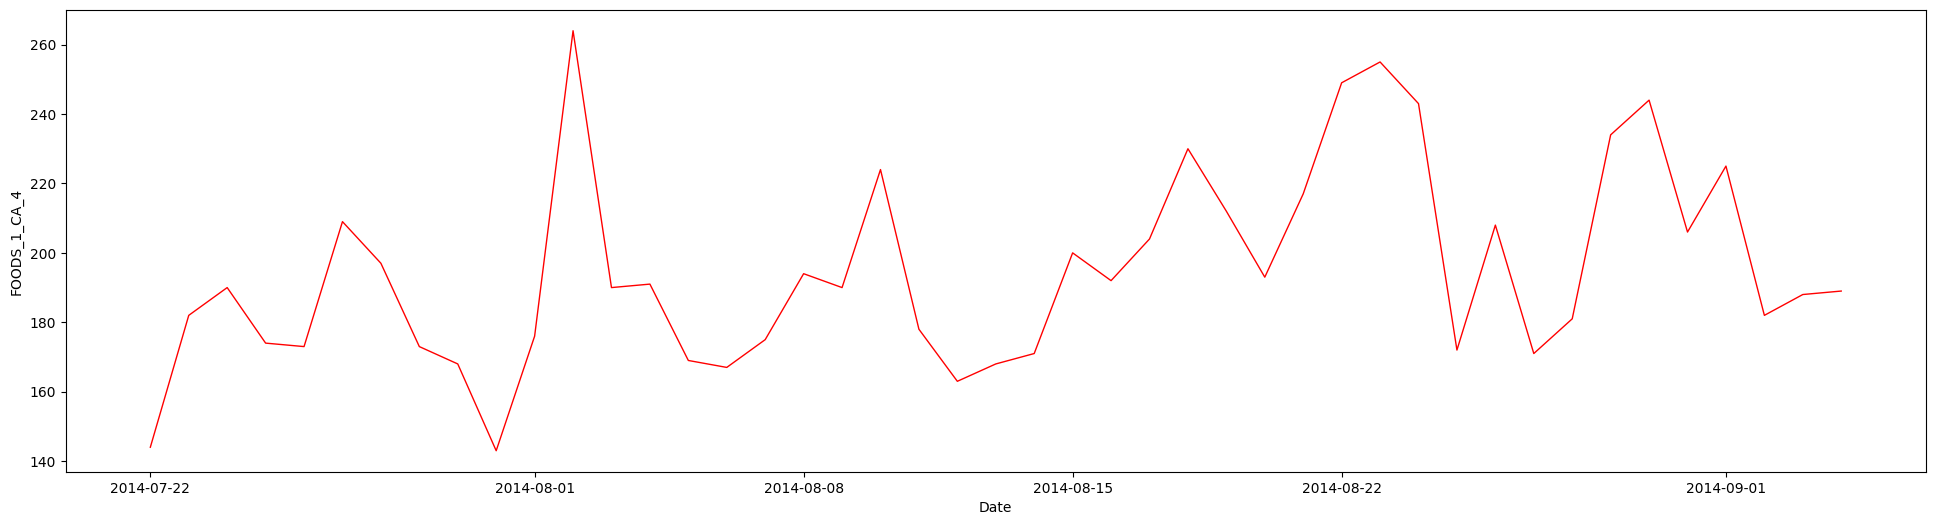

In [19]:
def plot_df(df, id, timestamp, graph_before, steps_ahead, plt_tmp=plt, unit='d'):
    true_y = df.loc[(df["unique_id"]==id) & (df["ds"]>=timestamp-pd.Timedelta(graph_before, unit=unit)) & (df["ds"]<timestamp+pd.Timedelta(steps_ahead, unit=unit)), "y"].to_numpy().flatten()
    plt_tmp.plot(df.loc[(df["unique_id"]==id) & (df["ds"]>=timestamp-pd.Timedelta(graph_before, unit=unit)) & (df["ds"]<timestamp+pd.Timedelta(steps_ahead, unit=unit)), "ds"].to_numpy().flatten(), true_y, label=f"True", linewidth=1, color='r')

plt.figure(figsize=(24,6))
id = 3
timestamp = pd.Timestamp("2014-08-12 00:00:00")
graph_before = 7*3
steps_ahead = 24
plot_df(df_single, id, timestamp, graph_before, steps_ahead)
plt.ylabel(column_dict[id][0])
plt.xlabel("Date")
plt.show()

In [22]:
df_single.to_csv('../data/m5/y_m5.csv')
pd.DataFrame(column_dict, columns = ['unique_id', 'mapped_id']).to_csv('../data/m5/id_mapping.csv')